# HW1 Linear regression and Newton's method

### input data

- File name : file contained mulit pairs (x,y)
- N : the number of polynomial of basis
- Lambda : rLSE parameter

### output

- vector : contain polynomail parameters (length : N)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def tranpose_matrix(m):
    row = len(m);
    col = len(m[0]);
    t = [];
    for i in range(col):
        t.append([m[j][i] for j in range(row)])
        
    return t;

def mul_matrix(a, b):
    row = len(a);
    mid = len(a[0]);
    if (mid != len(b)):
        return None;
    col = len(b[0]);
    r = [];
    for i in range(row):
        r.append([sum([a[i][k] * b[k][j] for k in range(mid)]) for j in range(col)])
    
    return r;

def add_matrix(a, b):
    if len(a) != len(b) or len(a[0]) != len(b[0]):
        raise Exception("row col not the same")
    c = []
    for i in range(len(a)):
        c.append(list(map(lambda x,y:x+y,a[i],b[i])))
    
    return c;

def mul_matrix_scalar(s, m):
    if type(m) != list:
        raise Exception("type error : " + str(type(m)))

    r = [];
    for i in m:
        r.append([j*s for j in i])
    
    return r;
        
def unit_matrix(n):
    unit = [];
    for i in range(n):
        unit.append([1 if i == j else 0 for j in range(n)])
    return unit

def solve_X_by_LU(L, U, y):
    x = [0 for _ in range(len(y))];
    Ux = [];
    for i in range(len(y)):
        tmp = y[i]
        for j in range(i):
            tmp = tmp - Ux[j]*L[i][j]
        Ux.append(tmp)
    for i in reversed(range(len(Ux))):
        tmp = Ux[i]
        for j in range(len(Ux) - i - 1):
            j = j + i + 1
            tmp = tmp - x[j]*U[i][j] 
        x[i] = tmp / U[i][i]
        
    return x;
    
def inverse_matrix(m):
    row = len(m)
    col = len(m[0])
    if (row != col):
        return None;
    L = unit_matrix(row);
    U = [list(m[i]) for i in range(row)];
    for i in range(row):
        for j in range(col):
            if j >= i:
                continue;
            L[i][j] = U[i][j]/U[j][j];
            U[i] = list(map(lambda x,y:x - (L[i][j] * y) , U[i], U[j]))
    
    b = unit_matrix(row)
    inverse_m = [];
    for i in b:
        inverse_m.append(solve_X_by_LU(L, U, i))
    inverse_m = tranpose_matrix(inverse_m)
    return inverse_m;

In [3]:
def polynomial_basis(x, n):
    return x**n;

def polynomial_equation(x_vector):
    return lambda x:sum([basis(x, i)*x_vector[-1-i][0] for i in range(len(x_vector))]);

In [12]:
def linear_regression(datas, N = 2, Lambda = 1.0):
    # create matrix
    A = [];
    b = [];

    for index, row in datas.iterrows():
        b.append([row['y']])
        A.append([basis(row['x'], (N - 1) - i) for i in range(N)])
    
    ATA = mul_matrix(tranpose_matrix(A), A)
    ATA_Lambda = add_matrix(ATA, mul_matrix_scalar(Lambda, unit_matrix(N)))
    x_vector = mul_matrix( inverse_matrix(ATA_Lambda), tranpose_matrix(A))
    x_vector = mul_matrix(x_vector, b)
    
    return x_vector;

In [5]:
# config

input_file = "data.csv";
N = 4;
Lambda = 1.0;

basis = polynomial_basis;

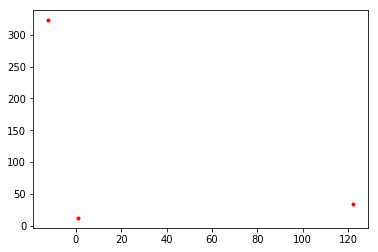

,x,y
0,1,12
1,122,34
2,-12,323


In [6]:
# load input and show data points

input_data = pd.read_csv(input_file, header=None, names=['x', 'y'])
plt.plot(input_data['x'], input_data['y'], 'r.')
plt.show()
input_data

In [138]:
# create matrix

A = [];
x_vector = [[0] for _ in range(N)];
b = [];

for index, row in input_data.iterrows():
    b.append([row['y']])
    A.append([basis(row['x'], (N - 1) - i) for i in range(N)])

In [139]:
pd.DataFrame(A)

,0,1,2
0,1,1,1
1,14884,122,1
2,144,-12,1


In [140]:
pd.DataFrame(x_vector)

,0
0,0
1,0
2,0


In [141]:
pd.DataFrame(b)

,0
0,12
1,34
2,323


In [143]:
ATA = mul_matrix(tranpose_matrix(A), A)
ATA_Lambda = add_matrix(ATA, mul_matrix_scalar(Lambda, unit_matrix(N)))
x_vector = mul_matrix( inverse_matrix(ATA_Lambda), tranpose_matrix(A))
x_vector = mul_matrix(x_vector, b)

In [26]:
x_vector = linear_regression(input_data, 3)

In [27]:
pd.DataFrame(x_vector)

,0
0,0.188303
1,-22.848022
2,18.779456


In [28]:
answer_line = polynomial_equation(x_vector)

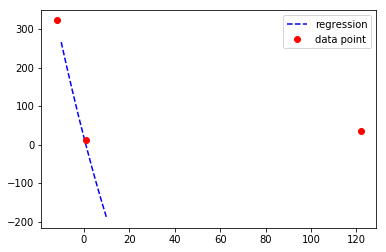

In [54]:
x_range = [i/100 for i in range(-1000,1000)]
y_range = [answer_line(x) for x in x_range]
plt.plot(x_range, y_range, 'b--', label='regression')
plt.plot(input_data['x'], input_data['y'], 'ro', label='data point')
plt.legend()
plt.show()

In [68]:
x_range = [i/100 for i in range(0,700)]

In [87]:
import random
import math
sin_data = []
random_dis = [random.random() for i in range(10)]
random_dis = [sum(random_dis[0:i+1])/sum(random_dis) for i in range(9)]

for i in random_dis:
    x = x_range[round(i*len(x_range))]
    y = math.sin(x) * (0.9 + 0.2*random.random())
    sin_data.append([x,y])

In [88]:
input_data_sin = pd.DataFrame(sin_data)
input_data_sin.columns = ['x', 'y']
input_data_sin

,x,y
0,0.07,0.067721
1,0.64,0.569210
2,1.47,0.910100
3,2.10,0.830122
4,2.36,0.682778
5,2.89,0.236033
6,4.09,-0.778760
7,4.21,-0.827332
8,5.59,-0.641403


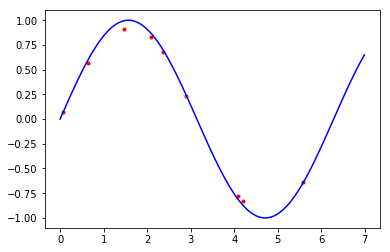

,x,y
0,1,12
1,122,34
2,-12,323


In [89]:
#input_data = pd.read_csv(input_file, header=None, names=['x', 'y'])
plt.plot(input_data_sin['x'], input_data_sin['y'], 'r.')
plt.plot(x_range, [math.sin(x) for x in x_range], 'b')
plt.show()
input_data

[[-0.004578802927915054], [0.07552951704506544], [-0.35572961803047565], [0.269807641023006], [0.7655473886840987], [0.02876341554306913]]


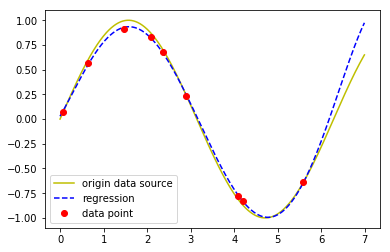

In [98]:
x_vector = linear_regression(input_data_sin, 6, 0.01)
print(x_vector)
answer_line = polynomial_equation(x_vector)
y_range = [answer_line(x) for x in x_range]
plt.plot(x_range, [math.sin(x) for x in x_range], 'y', label='origin data source')
plt.plot(x_range, y_range, 'b--', label='regression')
plt.plot(input_data_sin['x'], input_data_sin['y'], 'ro', label='data point')
plt.legend()
plt.show()